 # Exploratory Data Analysis
 
For this notebook, I will be using the following libraries:

- pandas for data manipulation.
- seaborn and matplotlib for data visualizing.
- scipy for statistical operations.

## 1- Import the required libraries

In [1]:
# Data manipulation and mathematical operations
import pandas as pd
import numpy as np 

# Data visualization 
%matplotlib inline
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

# # Statistical computations
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew

In [2]:
### Define some useful functions 
#The function is used to determine the type of the column:Categorical or Numerical  
def utils_recognize_type(dtf, col, max_cat):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

This notebook includes some instructions that should be pursued by any data scientist before applying any machine learning algorithm. It resumes all the required steps to be done during the data exploration phase. I suppose that I am using a cleaned data and all cleaning tasks were performed in the previous step: data cealing and transformation

Actually, the notebook is divided into two main parts :

        - Part 1: Data manipulation with pandas
        - Data visualization with matplotlib

## 2- Data reading 

In [13]:
df=pd.read_csv('./data/house_price_dataset.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [14]:
# Giving look to the tail
df.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## 3- Exploratory Analysis
- Exploratory Data Analysis (EDA), a method used to analyze and summarize data sets in a statistical manner. 
- EDA is the second step applied by data scientists to explore, analyze, and investigate a given clean data set.
- This essential examination step helps data scientists gather a general overview about their data, summarize its main characteristics and perform some primary representations. 

### 3.1- Primarily exploration

####  a. More information 

Here is more information about the features and types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### b. Statistical description 

Here is a statistical description (max, min, std etc.) of numerical features

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Including all features either numerical or categorical

In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### c. Values Count

If you want to know values count per feature. In the next example, I have selected `SaleCondition`. It is mostly used with categorical data. 

In [9]:
sale_condition_count=df['SaleCondition'].value_counts().to_frame()
sale_condition_count

,SaleCondition
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [12]:
#example with two columns
sale_condition_count=df[['SaleCondition','SaleType']].value_counts().to_frame()
sale_condition_count

0
SaleCondition SaleType      
Normal        WD        1160
Partial       New        122
Abnorml       WD          70
              COD         24
Family        WD          19
Normal        COD         19
Alloca        WD          12
Normal        ConLD        6
              ConLw        5
AdjLand       WD           4
Normal        ConLI        4
Abnorml       Oth          3
Normal        CWD          2
              Con          2
Abnorml       ConLD        2
Partial       WD           2
Family        CWD          1
Abnorml       CWD          1
              ConLI        1
Partial       ConLD        1

#### d. Data frame shape 
My data frame contains 1460 rows and 81 columns

In [11]:
df.shape

(1460, 81)

#### e.  Columns names 
Determining columns name in my data frame. Here I have 27 columns as I mentioned before. 

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3.2- Correlation

Before applying any machine learning algorithm, it is important to establish a correlation between the target variable and any other feature. Correlation analysis is very useful, especially, in regression problems as it helps identifies the most important features or any other variable that has direct impact on the target variable. 

Thus, it distinguishes variables that should be discarded from our analysis as they have no relation with our target feature. Only numerical varibale are considered within this representation.


In [31]:
#selecting only subset of our numerical features 
numerical_columns=['MSSubClass', 'LotArea', 'LotFrontage', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'SalePrice']
df_select=df[numerical_columns]
df_select.head(2)

# To tes more  'OverallQual', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF'

,MSSubClass,LotArea,LotFrontage,YearRemodAdd,YearBuilt,OverallCond,SalePrice
0,60,8450,65.0,2003,2003,5,208500
1,20,9600,80.0,1976,1976,8,181500


Many methods are useful to discover correlation between the target variable and the rest of the features such as pair plots, scatter plots, heatmaps and correlation matrix. Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

The correlation is calculated using the pearson correlation coefficient, which measures how closely two sequences of numbers are correlated. Therefore, only numerical attributes (floats and integers) are selected while calculating correlation coefficient.  


### a. Paiplots

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


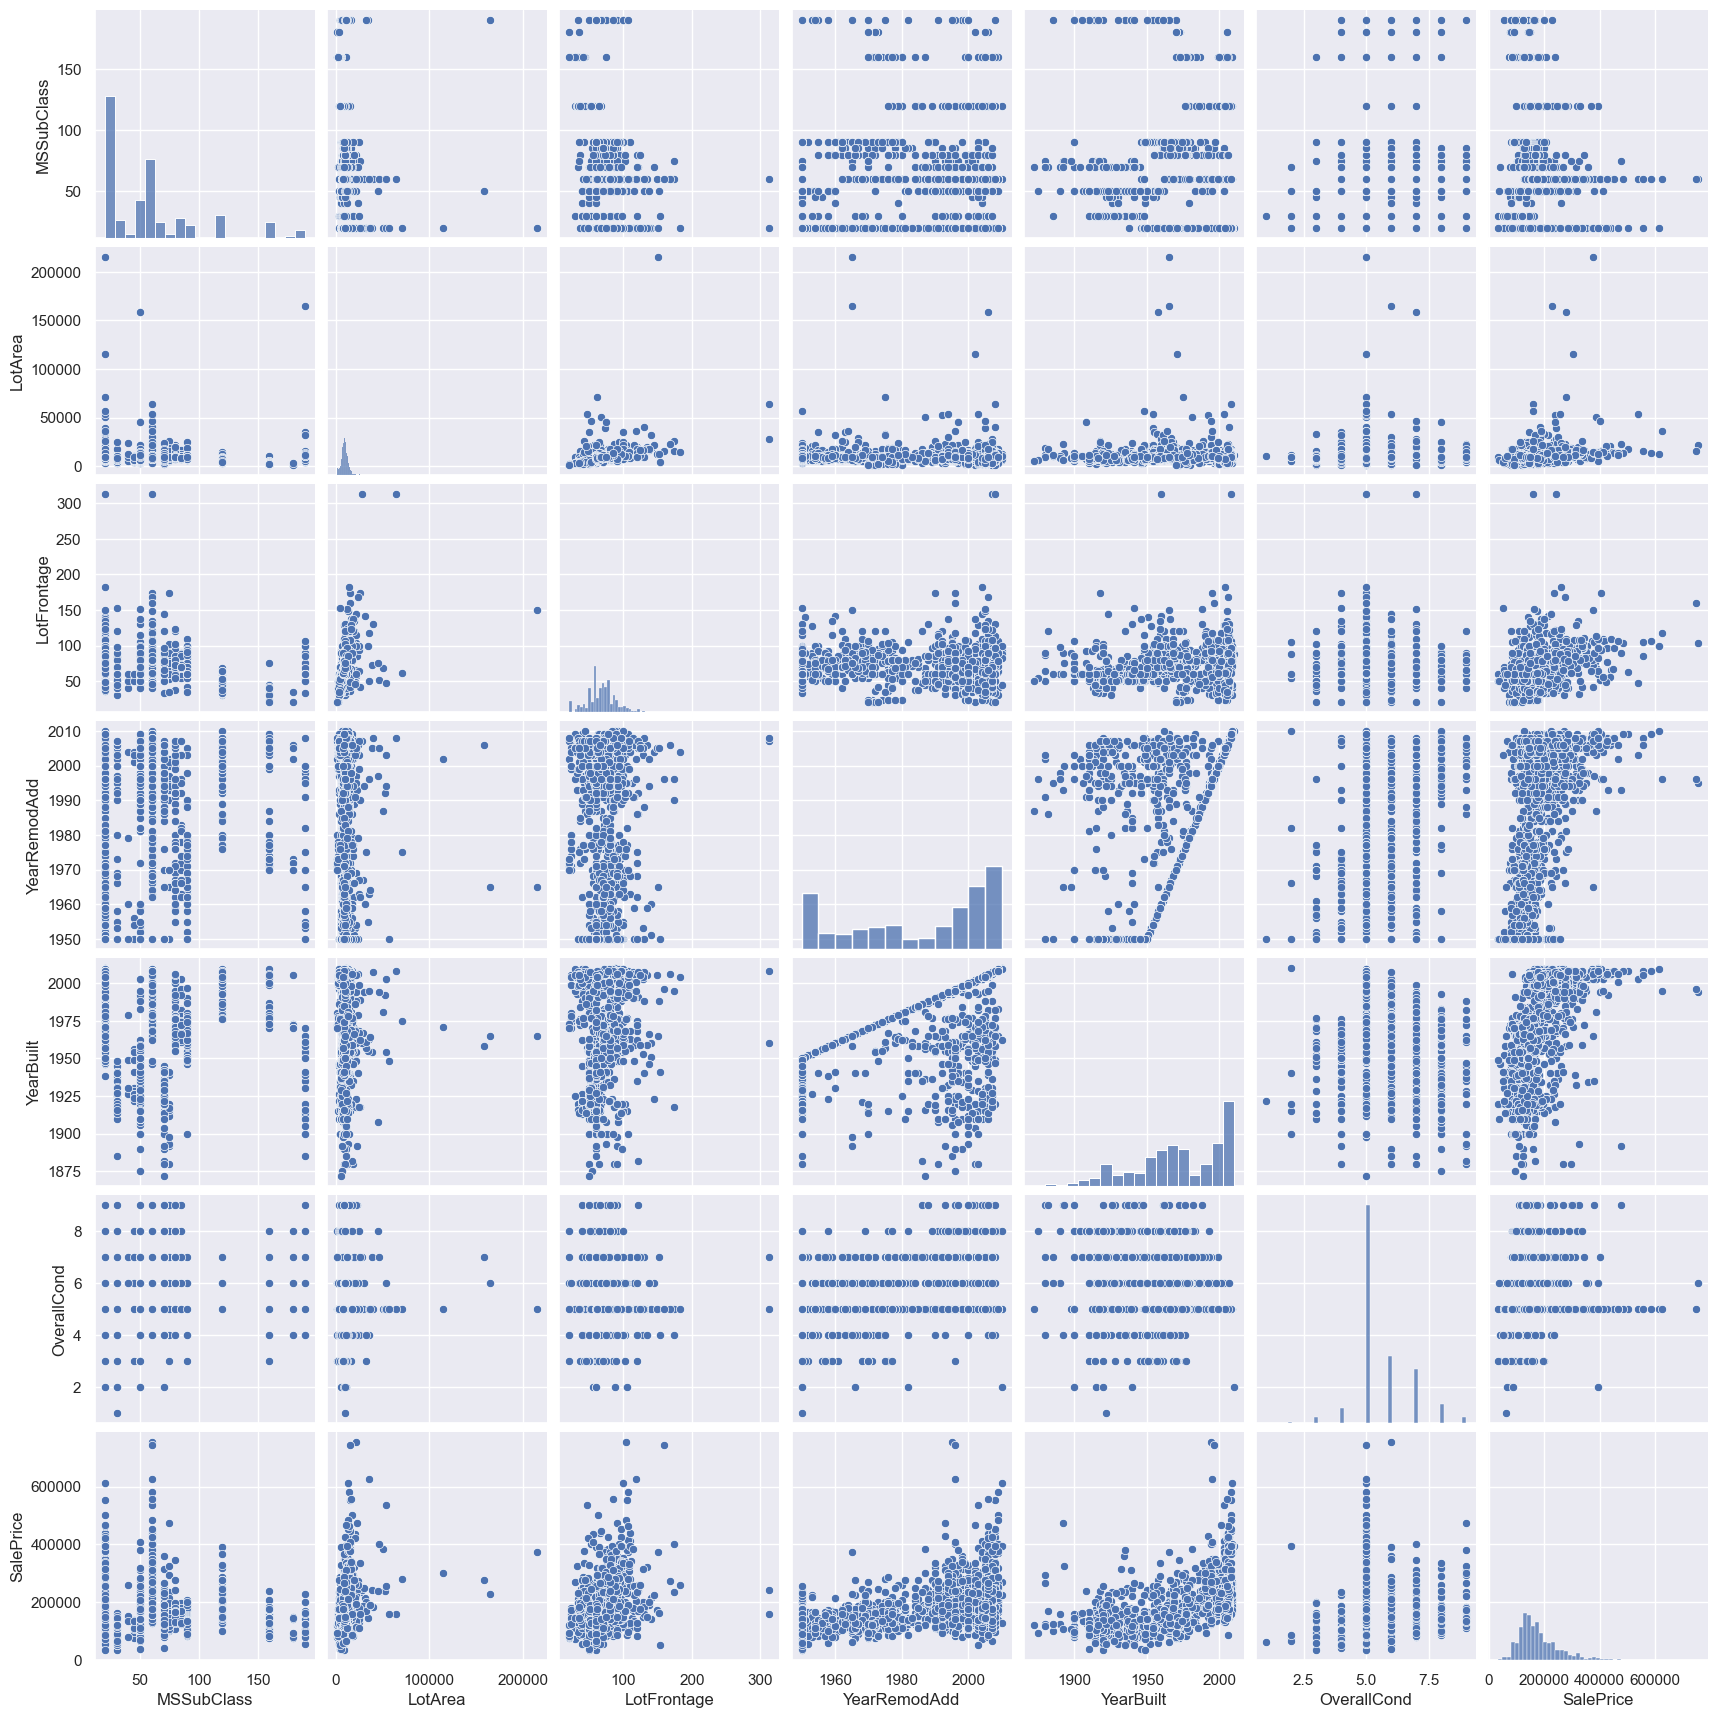

In [32]:
sns.set()
sns.pairplot(df_select, size = 2.5)
plt.show();

### b.Correlation matrix and heatmap

Text(0.5, 1.0, 'Heat Map')

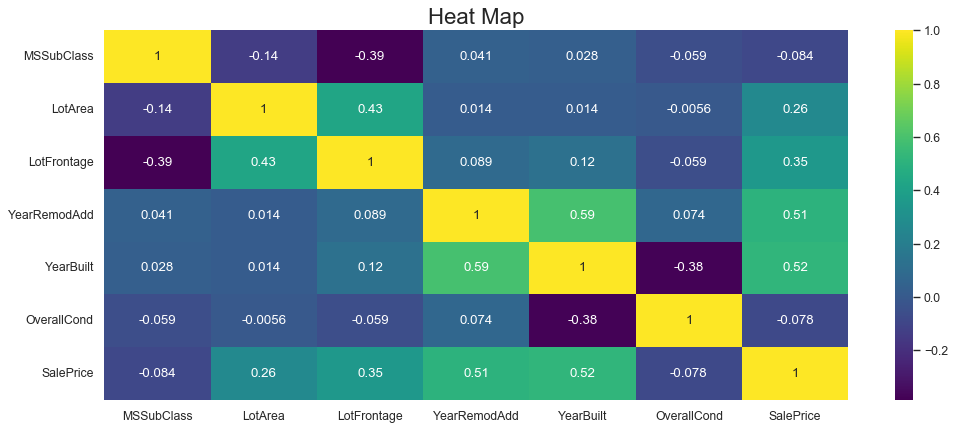

In [33]:
figure(figsize=(15, 6), dpi=80)
sns.heatmap(df_select.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

In [34]:
corr_matrix=df_select.corr()
corr_matrix

,MSSubClass,LotArea,LotFrontage,YearRemodAdd,YearBuilt,OverallCond,SalePrice
MSSubClass,1.000000,-0.139781,-0.386347,0.040581,0.027850,-0.059316,-0.084284
LotArea,-0.139781,1.000000,0.426095,0.013788,0.014228,-0.005636,0.263843
LotFrontage,-0.386347,0.426095,1.000000,0.088866,0.123349,-0.059213,0.351799
YearRemodAdd,0.040581,0.013788,0.088866,1.000000,0.592855,0.073741,0.507101
YearBuilt,0.027850,0.014228,0.123349,0.592855,1.000000,-0.375983,0.522897
OverallCond,-0.059316,-0.005636,-0.059213,0.073741,-0.375983,1.000000,-0.077856
SalePrice,-0.084284,0.263843,0.351799,0.507101,0.522897,-0.077856,1.000000


### c. Data Distribution

Actually, distribution plots are frequently used during Exploratory Data Analysis because they illustrate the values range taken by each of our variables as well as which values occur most often.

I am going to select only two variables, which are 'SalePrice' and 'LotFrontage' to show.

/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_5573/1098261288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_select['SalePrice'])
/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_5573/1098261288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_select['LotFr

<Axes: xlabel='LotFrontage', ylabel='Density'>

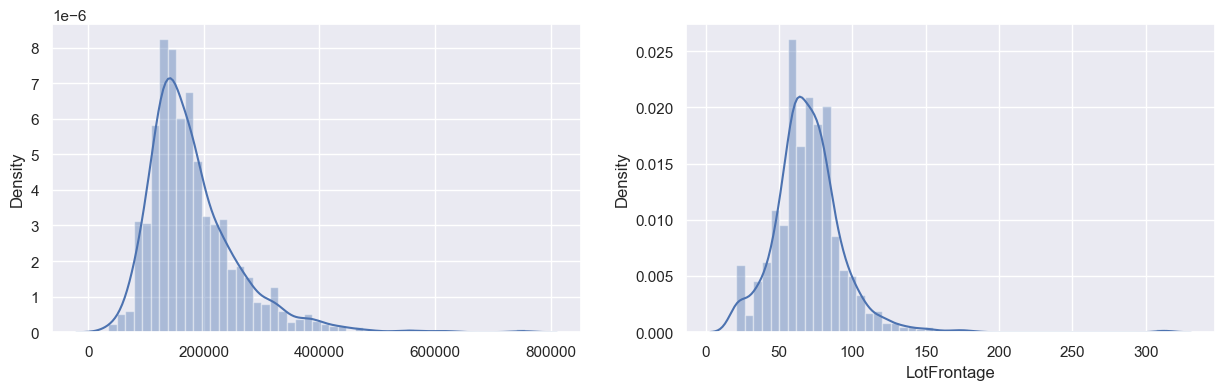

In [35]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.distplot(x=df_select['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(df_select['LotFrontage'])

<Axes: xlabel='LotFrontage', ylabel='Count'>

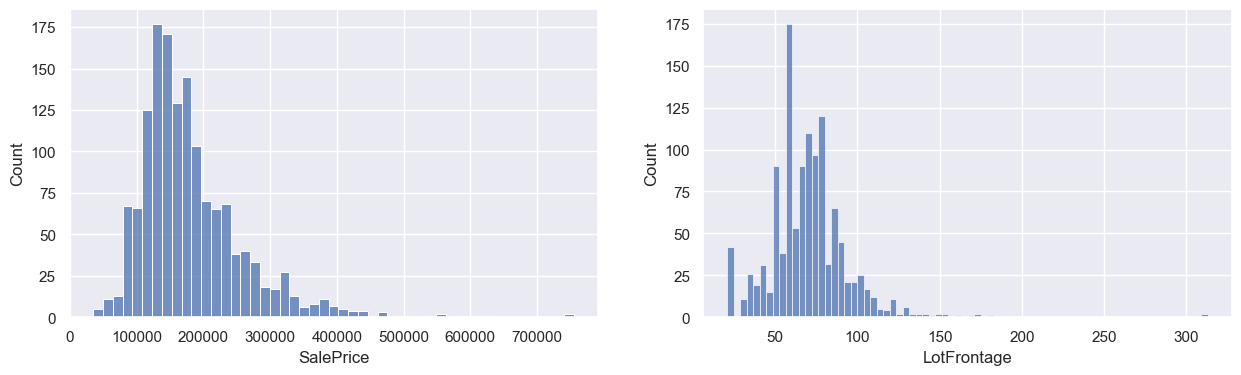

In [44]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.histplot(x=df_select['SalePrice'])
plt.subplot(1,2,2)
sns.histplot(df_select['LotFrontage'])

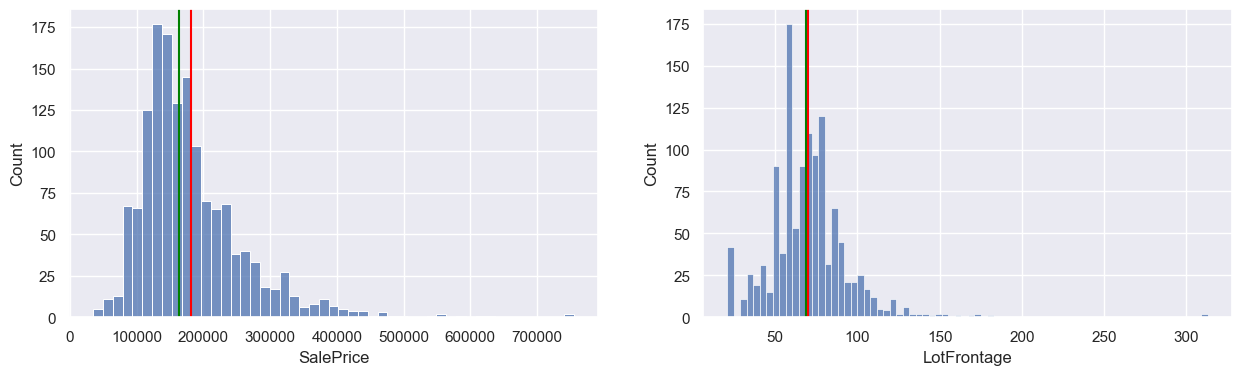

In [45]:
plt.figure(figsize=(15, 4))
#figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.histplot(x=df_select['SalePrice'])
plt.axvline(x = df['SalePrice'].mean(), c = 'red')
plt.axvline(x = df['SalePrice'].median(), c = 'green')
plt.subplot(1,2,2)
sns.histplot(df_select['LotFrontage'])
plt.axvline(x = df['LotFrontage'].median(), c = 'green')
plt.axvline(x = df['LotFrontage'].mean(), c = 'red')

    

## 4- Data visualization

Text(0.5, 0, 'Lot size in square feet')

<Figure size 640x480 with 0 Axes>

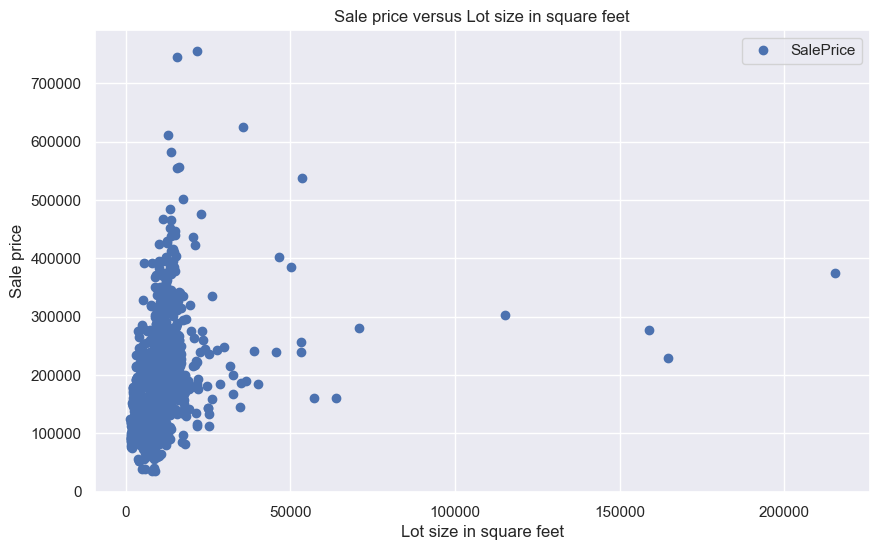

In [43]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Sale price versus Lot size in square feet')
ax=df_select.plot(x='LotArea', y='SalePrice', ax=ax, style='bo',grid=True)
ax.set_ylabel('Sale price')
ax.set_xlabel('Lot size in square feet')